In [2]:
from main import *

In [3]:

a = ScData("01_1")

Preparing the folders for the results.
Current System Path Changed to : C:\Users\mmusavi\Desktop\Code\CryPy\
Folder <01_1_DataOutPut> created.
                        name
0  Data\15x15x2_8_imagem.cam
Select your data by index :
analysing  15x15x2_8
mean background is = 2740.33
Background STD = 414.97


In [4]:
%matplotlib
a.take_molecules()
## [83] [69]

Using matplotlib backend: Qt5Agg
[83] [69]


Plotting 1 molecules spectrum...
All molecules fluorescence trace saved in the CSV file.
 Data now contains the molecules ...


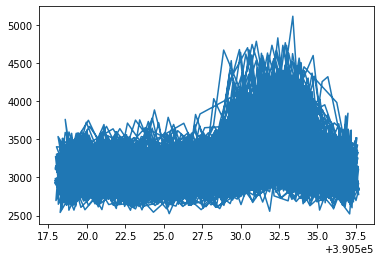

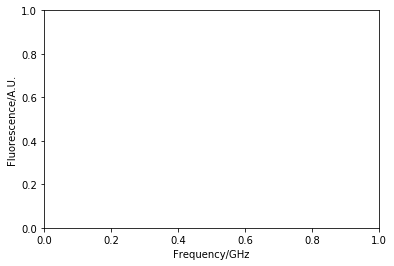

In [5]:
%matplotlib inline
a.add_mol_spec()
a.plot_mols()

In [6]:
%matplotlib
a.plot_mols()

Using matplotlib backend: Qt5Agg


In [7]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [9]:
%matplotlib inline
interact (a.plot_Diffusion, df = widgets.FloatSlider(min=0.01,max = 2, value= 0.5), dt = widgets.FloatSlider(min = 0.4, max = 10, value= 5))



interactive(children=(Text(value='mol0', description='molecule'), FloatSlider(value=0.5, description='df', max…

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>(*args, **kwargs)>

##### Upto now We have a normal diffusion map. We will extract every line and fit them with a lorentzian profile.

In [172]:
def lorentzian(f, f0, A0 , gamma, A1):
    a = gamma**2 /2
    L = A1* a/(a+(f-f0)**2)
    return L

Text(0.5, 1.0, 'Lorentzian Lineshape')

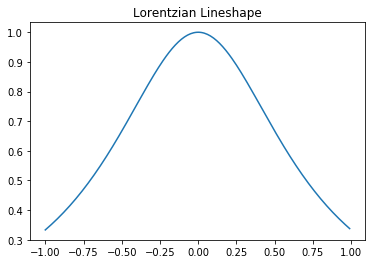

In [173]:
f= np.arange(-1,1,0.01)
plt.plot(f,lorentzian(f,0,0.2,1,1))
plt.title('Lorentzian Lineshape')

In [174]:
lorentzian(f,0,2,1,20000)

array([ 6666.66666667,  6756.30024998,  6847.43905779,  6940.10687765,
        7034.32751829,  7130.12477718,  7227.52240532,  7326.54406916,
        7427.21330957,  7529.55349748,  7633.58778626,  7739.33906044,
        7846.82988073,  7956.08242501,  8067.1184253 ,  8179.9591002 ,
        8294.62508295,  8411.13634452,  8529.51211191,  8649.77078107,
        8771.92982456,  8896.00569344,  9022.01371346,  9149.96797511,
        9279.88121752,  9411.76470588,  9545.62810233,  9681.47933004,
        9819.32443048,  9959.1674136 , 10101.01010101, 10244.85196189,
       10390.68994181, 10538.51828433, 10688.32834545, 10840.10840108,
       10993.84344767, 11149.5149961 , 11307.10085934, 11466.57493407,
       11627.90697674, 11791.06237472, 11956.00191296, 12122.68153716,
       12291.05211406, 12461.05919003, 12632.64274886, 12805.73697016,
       12980.26998962, 13156.16366268, 13333.33333333, 13511.68760978,
       13691.12814896, 13871.54945207, 14052.83867341, 14234.87544484,
      

In [175]:
from scipy.optimize import curve_fit

In [176]:
def fit_line(f,fluo,A0 , gamma = 1, f0= 0, A1 = 1):
    popt, pcov = curve_fit(lorentzian, f, fluo, p0=[f0, A0 , gamma, A1], bounds= ([-15,0,0.1,1],[15,20000,8,1000]))
    fprime = np.arange(-10,10,0.01)
    print("fit values : ", popt)
    plt.plot(fprime,lorentzian(fprime, *popt))


In [162]:
T = (a.data.ElapsedTime < 15) & (a.data.ElapsedTime>10)
data = a.data[T].copy()

In [177]:
data['f'] = (data['Frequency'] - data.Frequency.mean()) / 1e9
data = data.sort_values(by=['f'])
data.mol0 = data.mol0/data.mol0.max()
data

,DAQ_Index,ElapsedTime,Frequency,rawFreq,t,mol0,f
703,703,14.340,3.905179e+14,3.905177e+14,14.347333,0.619440,-10.223245
667,667,13.604,3.905181e+14,3.905176e+14,13.619000,0.609674,-10.052793
704,704,14.363,3.905181e+14,3.905183e+14,14.355333,0.604938,-10.004407
523,523,10.686,3.905182e+14,3.905183e+14,10.694333,0.601344,-9.891967
595,595,12.145,3.905184e+14,3.905185e+14,12.152667,0.662100,-9.739119
...,...,...,...,...,...,...,...
548,548,11.206,3.905371e+14,3.905376e+14,11.191333,0.581515,8.990015
691,691,14.100,3.905371e+14,3.905373e+14,14.100000,0.668865,8.992419
584,584,11.942,3.905372e+14,3.905374e+14,11.928000,0.624852,9.062522
692,692,14.122,3.905375e+14,3.905376e+14,14.114667,0.646415,9.356534


fit values :  [1.65015614e+00 1.99434589e+04 8.00000000e+00 1.00000000e+00]


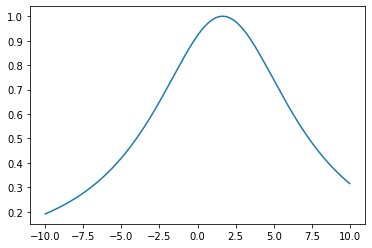

In [178]:
fit_line(data.f,data.mol0, A0=0, gamma = 2.5, f0=2.11,A1=1.1)

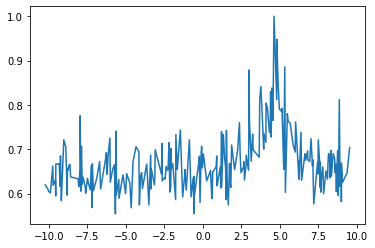

In [167]:
plt.plot(data.f,data.mol0)
